In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import requests
import json

100%|██████████| 19/19 [00:04<00:00,  4.22it/s]


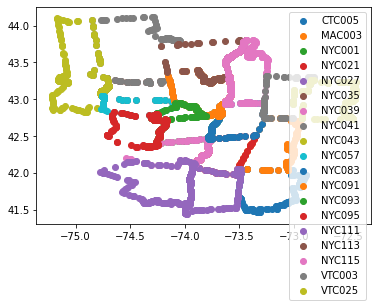

In [16]:
res = requests.get('https://api.weather.gov/offices/ALY')
res_counties = res.json()["responsibleCounties"]

cleaned_data = []

for each_counties in tqdm(res_counties):
    res = requests.get(each_counties)
    res_coordinates = res.json()["geometry"]["coordinates"][0]
    res_county_id = res.json()["properties"]["id"]
    cleaned_data.append((res_county_id, res_coordinates))

for each_data_point in cleaned_data:
    plt.scatter([i[0] for i in each_data_point[1]], [i[1] for i in each_data_point[1]], label=each_data_point[0])

plt.legend()
plt.show()

In [23]:
loaded_file = {}
with open("us-state-boundaries.json", "r") as data_file:
    loaded_file = json.load(data_file)

Massachusetts


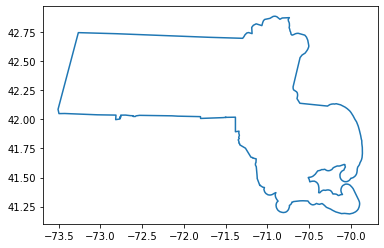

In [56]:
index = 49
coordinates = loaded_file[index]["fields"]["st_asgeojson"]["coordinates"][0]
print(loaded_file[index]["fields"]["name"])
plt.plot([i[0] for i in coordinates], [i[1] for i in coordinates])

In [104]:
new_england_states_index = []
for each_index in range(len(loaded_file)):
    state_name = loaded_file[each_index]['fields']['name']
    if state_name == "Vermont" or state_name == "New Hampshire" or state_name == "Maine" or state_name == "Connecticut" or state_name == "Massachusetts":
        new_england_states_index.append(each_index)

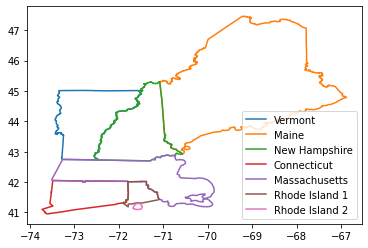

In [126]:
for each_index in new_england_states_index:
    name = loaded_file[each_index]["fields"]["name"]
    coordinates = loaded_file[each_index]["fields"]["st_asgeojson"]["coordinates"][0]
    plt.plot([i[0] for i in coordinates], [i[1] for i in coordinates], label=name)

# for Rhode Island
coordinates_1 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][0][0]
coordinates_2 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][1][0]
plt.plot([i[0] for i in coordinates_1], [i[1] for i in coordinates_1], label="Rhode Island 1")
plt.plot([i[0] for i in coordinates_2], [i[1] for i in coordinates_2], label="Rhode Island 2")

plt.legend()
plt.show()

In [106]:
for each_index in range(len(loaded_file)):
    state_name = loaded_file[each_index]['fields']['name']
    if state_name == "Rhode Island":
        print(each_index)

19


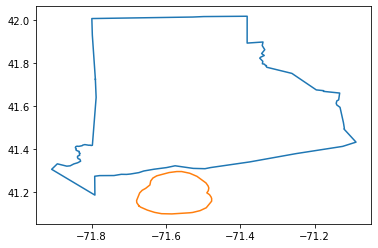

In [125]:
coordinates_1 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][0][0]
coordinates_2 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][1][0]
plt.plot([i[0] for i in coordinates_1], [i[1] for i in coordinates_1])
plt.plot([i[0] for i in coordinates_2], [i[1] for i in coordinates_2])